In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Grid
import MDAnalysis as md
import warnings
warnings.filterwarnings('ignore')

In [3]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,16)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [4]:
def avgNestedLists(nested_vals):
    """
    Averages a 2-D array and returns a 1-D array of all of the columns
    averaged together, regardless of their dimensions.
    """
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanmean(temp))
    return output

def stdNestedLists(nested_vals):
    """
    Averages a 2-D array and returns a 1-D array of all of the columns
    averaged together, regardless of their dimensions.
    """
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanstd(temp))
    return output

In [5]:
systems=["IA","PA","FA_G-prot","FA_no_G-prot"]
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "FA_no_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "IA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "PA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6"}
unique_lipids = ['POPC','POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'DPG3', 'DPSM', 'PAP6'] 
unique_lipid_labels = ['POPC','POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'GM3', 'SM', 'PIP2'] 

In [6]:
def load_data (systems, lipid):
    data_dir =  {"IA":"",
                "PA":"",
                "FA_G-prot":"",
                "FA_no_G-prot":""}
    for s in systems:
        data_loc = []
        for r in range(3):
            try:
                data_loc.append(np.loadtxt('CONTACT_PYTHON/{0:s}_{1:d}_{2:s}_total_number_of_contact_per_resid.txt'.format(s,r,lipid)))
            except OSError:
                print ('Does not exists!')
                continue
        data_dir[s]=data_loc
    return data_dir

In [7]:
def no_lipids (systems, lipid):
    data_dir =  {"IA":"",
                "PA":"",
                "FA_G-prot":"",
                "FA_no_G-prot":""}
    for s in systems:
        u = md.Universe('GRO/{0:s}_0_nowat.gro'.format(s))
        data_dir[s] = np.unique(u.select_atoms('resname {0:s}'.format(lipid)).resids).shape[0]
    return data_dir

In [10]:
def plot (systems, unique_lipids):
    ''''''
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']    
    fig, ax = plt.subplots(nrows=len(unique_lipids), ncols=4, sharex=True, sharey='row')
    sys_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c']
    unique_lipid_labels = ['POPC','POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'GM3', 'SM', 'PIP2'] 
    for idx, l in enumerate(unique_lipids):
        dir_data = load_data(systems, l)
        no_lipid = no_lipids(systems, l)
        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                total_num = no_lipid[s]
                Ava = np.array(avgNestedLists(data)) / total_num #Take the averaged across replicas and divided with the total number of the lipid
                Std = np.array(stdNestedLists(data))
                
                ax[idx, ndx].plot(Ava, color='black', linewidth=1)
                ax[0, ndx].set_title(s)
                #ax[idx, ndx].grid(True)
        
        ax[idx,3].text(460, np.mean(Ava), unique_lipid_labels[idx], rotation='vertical')
    xticks = np.arange(0,394, 65)
    xtick_labels = np.arange(26,420, 65)

    TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
    alpha_value=0.5

    for i in range(len(unique_lipids)):
        for j in range(4):
            ax[i,j].set_xticks(xticks)
            ax[i,j].set_xticklabels(xtick_labels, rotation='vertical')
            ax[i,j].axvspan(136, 166, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i,j].axvspan(172, 199, alpha=alpha_value, color=TM_color_list[1], label='TM2')
            ax[i,j].axvspan(219, 255, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i,j].axvspan(261, 288, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i,j].axvspan(301, 334, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i,j].axvspan(341, 371, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i,j].axvspan(376, 403, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i,j].axvspan(407, 419, alpha=alpha_value, color=TM_color_list[7], label='H8') 
    
    
    ax[0,3].legend(loc='upper center', bbox_to_anchor=(1.6, -0.3),
              fancybox=True, shadow=True, ncol=1, frameon=False)
                
    ax[3,0].set_ylabel('Ratio contact')
    plt.tight_layout()
    return 

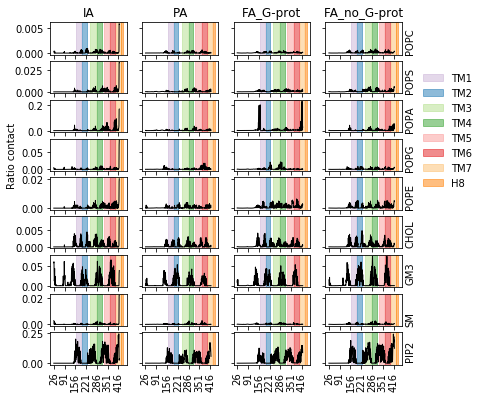

In [9]:
plot(systems, unique_lipids)
plt.savefig('Num_contacts2.png', dpi=300, bbox_inches='tight')

In [11]:
def plot2 (systems, unique_lipids):
    ''''''
    unique_lipid_labels = ['POPC','POPS', 'POPA', 'POPG', 'POPE', 'CHOL', 'GM3', 'SM', 'PIP2'] 
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']    
    fig, ax = plt.subplots(nrows=len(unique_lipids), ncols=4, sharex=True, sharey='row')
    sys_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c']

    for idx, l in enumerate(unique_lipids):
        dir_data = load_data(systems, l)
        no_lipid = no_lipids(systems, l)
        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                total_num = no_lipid[s]
                Ava = (np.array(avgNestedLists(data)) / total_num)*100 #Take the averaged across replicas and divided with the total number of the lipid
                Std = np.array(stdNestedLists(data))
                
                ax[idx, ndx].plot(Ava, color='black', linewidth=1)
                ax[0, ndx].set_title(s)
                #ax[idx, ndx].grid(True)
        
        ax[idx,3].text(460, np.mean(Ava), unique_lipid_labels[idx], rotation='vertical')
    xticks = np.arange(0,394, 65)
    xtick_labels = np.arange(26,420, 65)

    TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
    alpha_value=0.5

    for i in range(len(unique_lipids)):
        for j in range(4):
            ax[i,j].set_xticks(xticks)
            ax[i,j].set_xticklabels(xtick_labels, rotation='vertical')
            ax[i,j].axvspan(136, 166, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i,j].axvspan(172, 199, alpha=alpha_value, color=TM_color_list[1], label='TM2')
            ax[i,j].axvspan(219, 255, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i,j].axvspan(261, 288, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i,j].axvspan(301, 334, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i,j].axvspan(341, 371, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i,j].axvspan(376, 403, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i,j].axvspan(407, 419, alpha=alpha_value, color=TM_color_list[7], label='H8') 
    
    
    ax[0,3].legend(loc='upper center', bbox_to_anchor=(1.6, -0.3),
              fancybox=True, shadow=True, ncol=1, frameon=False)
                
    ax[3,0].set_ylabel('Percentage contact')
    plt.tight_layout()
    return 

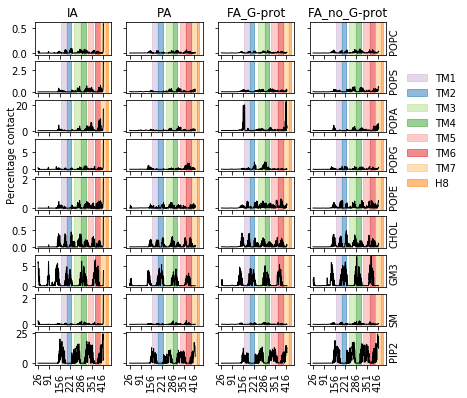

In [12]:
plot2(systems, unique_lipids)
plt.savefig('Percentage_contacts.png', dpi=300, bbox_inches='tight')